Гипотеза 1: Влияние уровня религиозности на уровень счастья

- Нулевая гипотеза H0: Уровень счастья не зависит от уровня религиозности

- Альтернативная гипотеза H1: Уровень счастья зависит от уровня религиозности

Предпосылки: Религиозные люди могут ощущать себя более счастливыми благодаря поддержке общества и их религиозных сообществ, веры в лучшее будущее и возможные вознаграждения, а так же из-за того, что религиозные практики носят медитативный характер, позволяя снять стресс и настроиться на позитивные мысли.

Гипотеза 2: Влияние уровня патриотизма на уровень счастья
- Нулевая гипотеза H0: Уровень счастья не зависит от уровня патриотизма

- Альтернативная гипотеза H1: Уровень счастья зависит от уровня патриотизма

Предпосылки: Патриоты могут ощущать себя более счастливыми из-за того, что патриотизм даёт человеку чувство принадлежности к обществу/нации, мотивирует на активное участие в общественной жизни, соотвественно позволяет вносить свой вклад в общее благо, что помогает справиться с чувством одиночества. Так же эти люди склонны смотреть на собственную жизнь и свои достижения через призму процветания и побед своей страны, что способствует более положительному восприятию себя, более высокой самооценке и общеё удовлетворённостью.

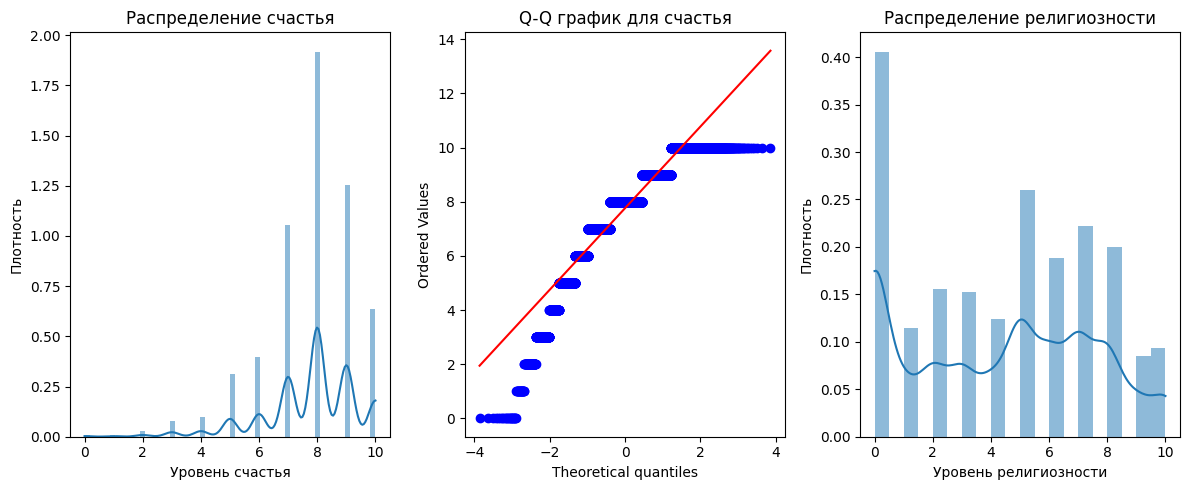

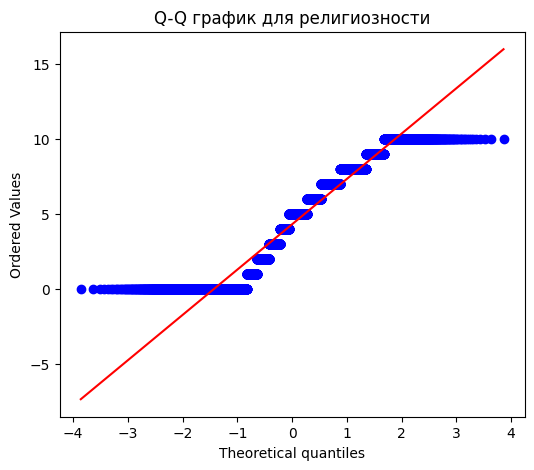

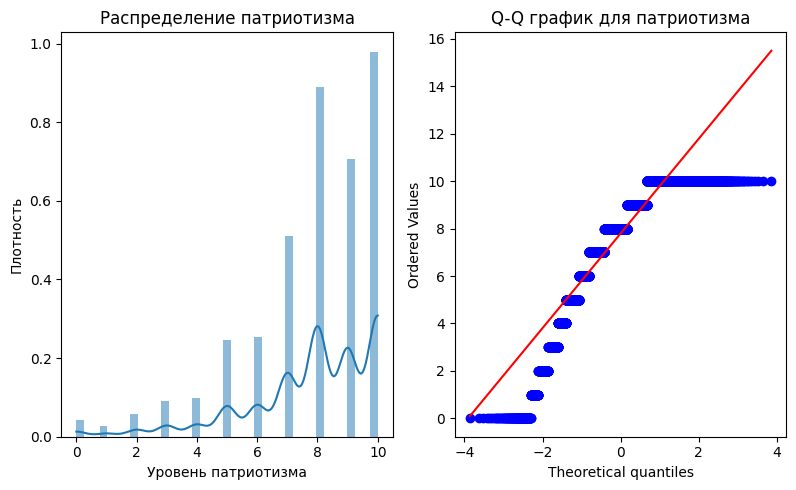

In [ ]:
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data_cleaned.csv')


# Приверим нормальность распределения данных: построим гистограммы и Q-Q графики для переменных

# Визуализация распределения счастья
plt.figure(figsize=(12, 5))

# Гистограмма с кривой плотности
plt.subplot(1, 3, 1)
sns.histplot(data['happy'], kde=True, stat="density", linewidth=0)
plt.title('Распределение счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Плотность')

# Q-Q график для счастья
plt.subplot(1, 3, 2)
stats.probplot(data['happy'], dist="norm", plot=plt)
plt.title('Q-Q график для счастья')

# Визуализация распределения религиозности
plt.subplot(1, 3, 3)
sns.histplot(data['rlgdgr'], kde=True, stat="density", linewidth=0)
plt.title('Распределение религиозности')
plt.xlabel('Уровень религиозности')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

# Q-Q график для религиозности
plt.figure(figsize=(6, 5))
stats.probplot(data['rlgdgr'], dist="norm", plot=plt)
plt.title('Q-Q график для религиозности')
plt.show()

# Визуализация распределения патриотизма
plt.figure(figsize=(12, 5))

# Гистограмма с кривой плотности
plt.subplot(1, 3, 1)
sns.histplot(data['atchctr'], kde=True, stat="density", linewidth=0)
plt.title('Распределение патриотизма')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Плотность')

# Q-Q график для патриотизма
plt.subplot(1, 3, 2)
stats.probplot(data['atchctr'], dist="norm", plot=plt)
plt.title('Q-Q график для патриотизма')

plt.tight_layout()
plt.show()

Из графиков делаем вывод, что данные распределены не нормально. Разобьём данные на группы: низкий (0-3), средний (4-6), высокий (7-10) уровни религиозности/патриотизма. Далее воспользуемся критерием Краскала-Уоллиса для проверки различий между этими группами.

Гипотеза 1: религиозность и счастье
H-статистика: 23.94550355795974, P-значение: 6.313933001545554e-06
Отвергаем нулевую гипотезу
Гипотеза 2: патриотизм и счастье
H-статистика: 239.11064765250458, P-значение: 1.1961415596528358e-52
Отвергаем нулевую гипотезу


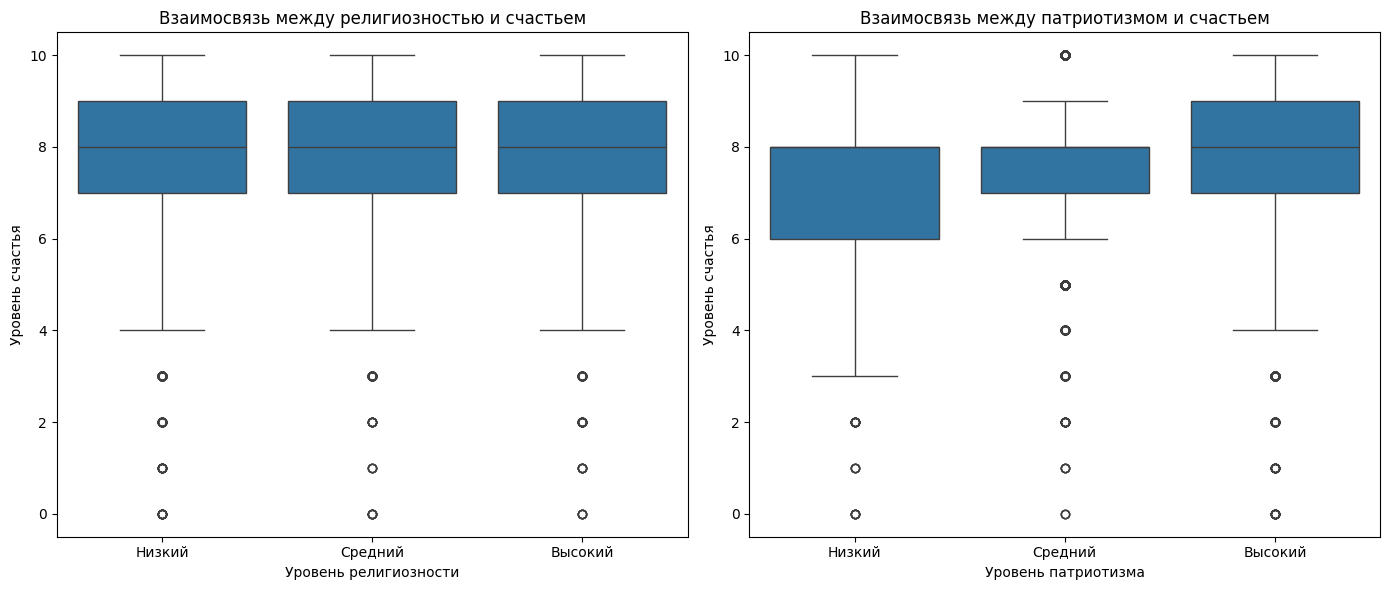

In [ ]:
# Гипотеза 1: Религиозность и счастье
# Разбиваем респондентов на группы по уровням религиозности
data['rlgdgr_cat'] = pd.cut(data['rlgdgr'], bins=[-1, 3, 6, 10], labels=['Низкий', 'Средний', 'Высокий'])

# Критерий Краскала-Уоллиса
h_stat, p_value_religious = stats.kruskal(
    data[data['rlgdgr_cat'] == 'Низкий']['happy'],
    data[data['rlgdgr_cat'] == 'Средний']['happy'],
    data[data['rlgdgr_cat'] == 'Высокий']['happy']
)

print("Гипотеза 1: религиозность и счастье")
print(f"H-статистика: {h_stat}, P-значение: {p_value_religious}")

# Проверяем гипотезу
alpha = 0.05
if p_value_religious < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Гипотеза 2: Патриотизм и счастье
# Разбиваем респондентов на группы по уровням патриотизма
data['atchctr_cat'] = pd.cut(data['atchctr'], bins=[-1, 3, 6, 10], labels=['Низкий', 'Средний', 'Высокий'])

# Критерий Краскала-Уоллиса
h_stat_pat, p_value_pat = stats.kruskal(
    data[data['atchctr_cat'] == 'Низкий']['happy'],
    data[data['atchctr_cat'] == 'Средний']['happy'],
    data[data['atchctr_cat'] == 'Высокий']['happy']
)

print("Гипотеза 2: патриотизм и счастье")
print(f"H-статистика: {h_stat_pat}, P-значение: {p_value_pat}")

# Проверим гипотезу
if p_value_pat < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Посмотрим на графиках взаимосвязи
plt.figure(figsize=(14, 6))

# Диограмма для религиозности и счастья
plt.subplot(1, 2, 1)
sns.boxplot(x='rlgdgr_cat', y='happy', data=data)
plt.title('Взаимосвязь между религиозностью и счастьем')
plt.xlabel('Уровень религиозности')
plt.ylabel('Уровень счастья')

# Диограмма для патриотизма и счастья
plt.subplot(1, 2, 2)
sns.boxplot(x='atchctr_cat', y='happy', data=data)
plt.title('Взаимосвязь между патриотизмом и счастьем')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Уровень счастья')

plt.tight_layout()
plt.show()

Оценим дополнительно степень и направление связи между переменными с помощью корреляции Спирмена.

Религиозность и счастье
Коэффициент корреляции: 0.03855702015030618, P-значение: 1.9790845383988675e-05
Отвергаем нулевую гипотезу


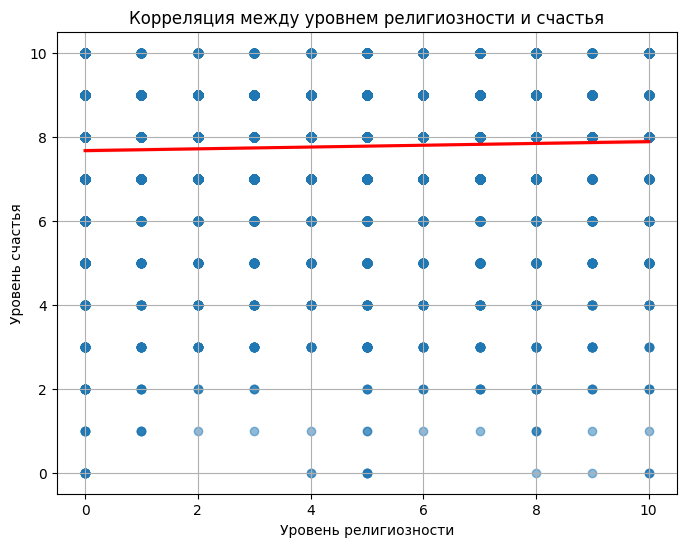


Патриотизм и счастье
Коэффициент корреляции: 0.1839953545122472, P-значение: 1.1301084775903286e-93
Отвергаем нулевую гипотезу


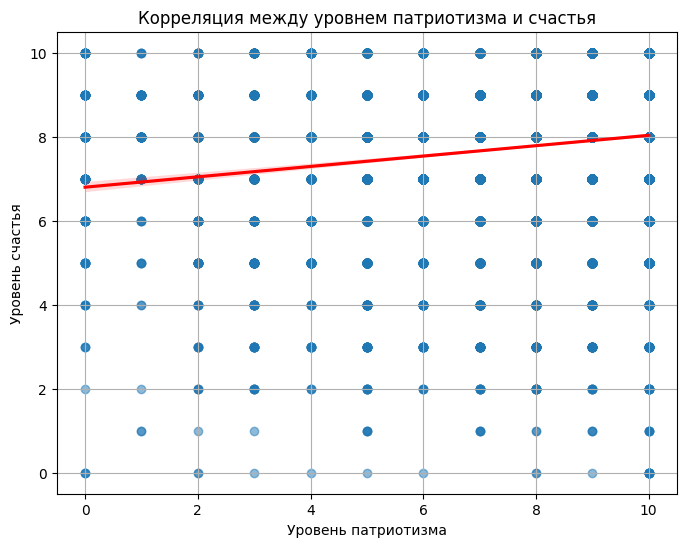

In [ ]:
# Корреляция Спирмена для религиозности
spearman_corr_religious = stats.spearmanr(data['rlgdgr'], data['happy'])
print("Религиозность и счастье")
print(f"Коэффициент корреляции: {spearman_corr_religious.correlation}, P-значение: {spearman_corr_religious.pvalue}")

# Проверим гипотезу
alpha = 0.05
if spearman_corr_religious.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Визуализация корреляции религиозности и счастья
plt.figure(figsize=(8, 6))
sns.regplot(x='rlgdgr', y='happy', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Корреляция между уровнем религиозности и счастья')
plt.xlabel('Уровень религиозности')
plt.ylabel('Уровень счастья')
plt.grid()
plt.show()

# Корреляция Спирмена для патриотизма
spearman_corr_patriotic = stats.spearmanr(data['atchctr'], data['happy'])
print("\nПатриотизм и счастье")
print(f"Коэффициент корреляции: {spearman_corr_patriotic.correlation}, P-значение: {spearman_corr_patriotic.pvalue}")

# Проверим гипотезу
if spearman_corr_patriotic.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Визуализация корреляции патриотизма и счастья
plt.figure(figsize=(8, 6))
sns.regplot(x='atchctr', y='happy', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Корреляция между уровнем патриотизма и счастья')
plt.xlabel('Уровень патриотизма')
plt.ylabel('Уровень счастья')
plt.grid()
plt.show()



Критерий Краскала-Уоллиса показывает, что уровень религиозности влияет на уровень счастья, однако оэффициент корреляции 0.039 указывает на то, что связь между религиозностью и счастьем очень слаба, несмотря на статистическую значимость p < 0.05. Это может указывать на то, что в выборке есть группы, которые сильно различаются по уровню счастья/религиозности, но в общем связь между ними не сильная. Например большинство респондентов могут иметь высокий уровень счастья и среди них есть группа с низким уровнем религиозности, тогда это повлияет на результаты. Из этого можем сделать вывод, что счастье практически не зависит от уровня религиозности.

В случае с влиянием патриотизма на счастье всё более однозначно. Критерий Краскала-Уоллиса показывает, что уровень счастья зависит от уровня патриотизма, что далее подтверждается корреляцией Спирмена. Коэффициент корреляции 0.184 указывает на слабую положительную корреляцию между патриотизмом и счастьем, что говорит о том, что по мере увеличения степени патриотизма уровень счастья тоже увеличивается, что подтверждается графиками. Однако патриотизм не является главным фактором влияющим на уровень счастья.